# Bài 1

Tại một node thứ $i$ của layer $k$ có bias $b_i^{(k)}$, ta thực hiện hai bước:


*   Tính tổng linear: $\displaystyle z_i^{(k)} = \sum_{j=1}^{l^{(k-1)}}a_j^{(k-1)}*w_{ji}^{(k)} + b_i^{(k)}$, là tổng tất cả các node layer trước nhân với hệ số $w$ tương ứng rồi cộng với b.
*   Áp dụng hàm kích hoạt: $a_i^{(k)} = σ(z_i^{(k)})$, với $\sigma$ là hàm kích hoạt.

Với $l^{(k)}$ là số lượng node của layer thứ $k$

Biểu diễn bằng ma trận. <br>
Ta có ma trận trọng số của layer thứ k và vector bias của nó:

$\displaystyle 
W^{(k)} = 
\begin{bmatrix}
w_{11}^{(k)} && w_{12}^{(k)} && ... && w_{1l^{(k)}}^{(k)} \\
w_{21}^{(k)} && w_{22}^{(k)} && ... && w_{2l^{(k)}}^{(k)} \\
... && ... && ... && ... \\
w_{l^{(k-1)}1}^{(k)} && w_{l^{(k-1)}2}^{(k)} && ... && w_{l^{(k-1)}l^{(k)}}^{(k)} \\
\end{bmatrix}
,\quad
b^{(k)} = 
\begin{bmatrix}
b_1^{(k)} \\
b_2^{(k)} \\
... \\
b_{l^{(k)}}^{(k)} \\
\end{bmatrix}
$

Ma trận đầu vào của layer $k$:

$\displaystyle
Z^{(k)} = 
\begin{bmatrix}
z_1^{[1](k)} && z_2^{[1](k)} && ... && z_{l^{(k)}}^{[1](k)} \\
z_1^{[2](k)} && z_2^{[2](k)} && ... && z_{l^{(k)}}^{[2](k)} \\
... && ... && ... && ...\\
z_1^{[N](k)} && z_2^{[N](k)} && ... && z_{l^{(k)}}^{[N](k)} \\
\end{bmatrix}
$

Ma trận đầu ra của layer $k$:

$\displaystyle
A^{(k)} =
\begin{bmatrix}
a_1^{[1](k)} && a_2^{[1](k)} && ... && a_{l^{(k)}}^{[1](k)} \\
a_1^{[2](k)} && a_2^{[2](k)} && ... && a_{l^{(k)}}^{[2](k)} \\
... && ... && ... && ...\\
a_1^{[N](k)} && a_2^{[N](k)} && ... && a_{l^{(k)}}^{[N](k)} \\
\end{bmatrix}
$

Tại layer $k$, ta thực hiện hai bước:


*   Tính ma trận đầu vào: $Z^{(k)} = A^{(k-1)}*W^{(k)} + b^{(k)}$
*   Tính đầu ra: $A^{(k)} = \sigma(Z^{(k)})$



## Chạy code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def softmax(Z):
    e_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    A = e_Z / e_Z.sum(axis=1, keepdims=True)
    return A


def softmax_loss(X, y, W):
    A = softmax(X.dot(W))
    id0 = range(X.shape[0])
    return -np.mean(np.log(A[id0, y]))


def softmax_grad(X, y, W):
    A = softmax(X.dot(W))  # shape (N, C)
    id0 = range(X.shape[0])
    A[id0, y] -= 1  # A - Y, shape (N, C)
    return X.T.dot(A) / X.shape[0]  # shape (d, C)


def softmax_fit(X, y, W, lr, epochs, batch_size):
    N = X.shape[0]
    loss_hist = [softmax_loss(X, y, W)]
    batches = int(np.ceil(N/batch_size))
    W_old = W.copy()

    for ep in range(epochs):
        mix_ids = np.random.permutation(N)

        for i in range(batches):
            batch_ids = mix_ids[batch_size*i: min(batch_size*(i+1), N)]
            X_batch, y_batch = X[batch_ids], y[batch_ids]
            W -= lr*softmax_grad(X_batch, y_batch, W)

        loss_hist.append(softmax_loss(X, y, W))
        if np.linalg.norm(W - W_old) / W.size < 1e-5:
            break
        W_old = W.copy()
    return W, loss_hist


In [40]:
C = 3
N = 500
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
X = np.concatenate((X0, X1, X2), axis = 0) 
Xbar = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1)

y = np.asarray([0]*N + [1]*N + [2]*N)

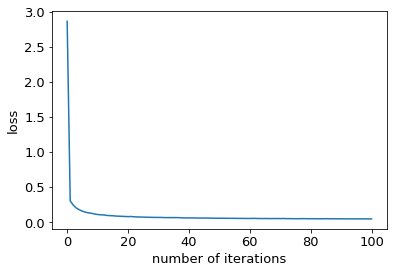

In [41]:
W_init = np.random.randn(Xbar.shape[1], C)
W, loss_hist = softmax_fit(Xbar, y, W_init, batch_size = 10, epoches = 100, lr = 0.05)

plt.plot(loss_hist)
plt.xlabel('number of iterations', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()


# Bài 2

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras import backend as K
from keras.utils import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
batch_size = 128  
n_classes = 10  
epochs = 15

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(-1, 784)
X_train = X_train.astype('float32')
X_test = X_test.reshape(-1, 784)
X_test = X_test.astype('float32')

# normalize
X_train /= 255
X_test /= 255
print('Train samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])

Train samples: 60000
Test samples: 10000


In [4]:
# convert to one-hot encoding (binary class matrices)
print(y_train[0])
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Change learning rate

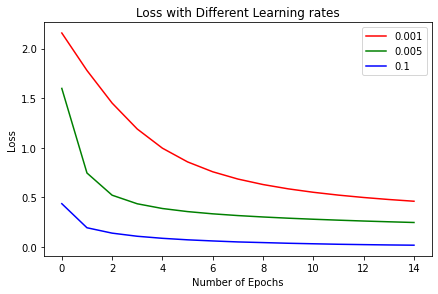

In [17]:
learning_rate = [0.001, 0.005, 0.1]
colors = ['r', 'g', 'b']
for i, lr in enumerate(learning_rate):
    model = Sequential()

    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(learning_rate=lr),
                  metrics=['accuracy'])

    H = model.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=0,
                  validation_data=(X_test, y_test))
    plt.plot(H.history['loss'], colors[i])

plt.title('Loss with Different Learning rates')
plt.legend(learning_rate)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()


## Change active function

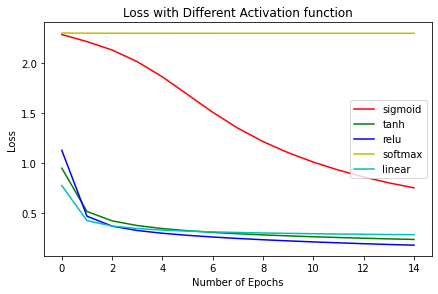

In [5]:
# Đổi activation function thành sigmoid, tanh, softmax, linear
activation_function = ['sigmoid', 'tanh', 'relu', 'softmax', 'linear']
colors = ['r', 'g', 'b', 'y', 'c']
for i, af in enumerate(activation_function):
    model = Sequential()

    model.add(Dense(512, activation=af, input_shape=(784,)))
    model.add(Dense(32, activation=af))
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])

    H = model.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=0,
                  validation_data=(X_test, y_test))
    plt.plot(H.history['loss'], colors[i])

plt.title('Loss with Different Activation function')
plt.legend(activation_function)
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()


## Change the number of hidden layers.

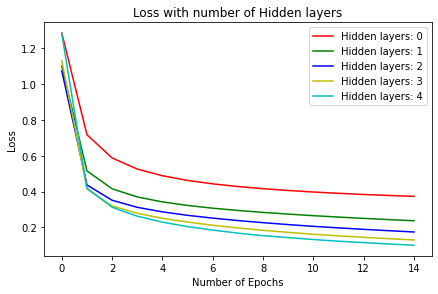

In [7]:
nodes = [
    [],
    [624],
    [624, 151],
    [624, 151, 80],
    [624, 151, 80, 32]
]
for i, node in enumerate(nodes):
    model = Sequential()

    # hidden layer 1
    if len(node) >= 1:
        model.add(Dense(node[0], activation='relu', input_shape=(784,)))

    # hidden layer 2 -> i
    for i in range(2, i+1):
        model.add(Dense(node[i-1], activation='relu'))

    # output
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])

    H = model.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=0,
                  validation_data=(X_test, y_test))
    plt.plot(H.history['loss'], colors[i])

plt.title('Loss with number of Hidden layers')
plt.legend([("Hidden layers: " + str(len(node))) for node in nodes], loc='best')
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()


## Change the number of nodes

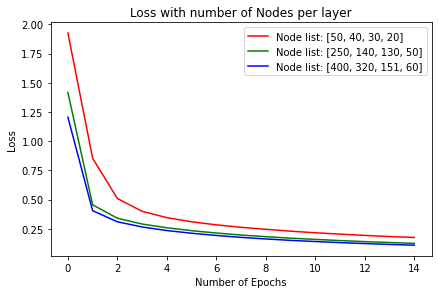

In [10]:
nodes = [
    [50, 40, 30, 20],
    [250, 140, 130, 50],
    [400, 320, 151, 60]
]
for i, node in enumerate(nodes):
    model = Sequential()

    # hidden layer 1
    if len(node) >= 1:
        model.add(Dense(node[0], activation='relu', input_shape=(784,)))

    # hidden layer 2->4
    for j in range(1, 4):
        model.add(Dense(node[j], activation='relu'))

    # output
    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])

    H = model.fit(X_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=0,
                  validation_data=(X_test, y_test))
    plt.plot(H.history['loss'], colors[i])

plt.title('Loss with number of Nodes per layer')
plt.legend([("Node list: " + str(node)) for node in nodes], loc='best')
plt.tight_layout()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show()


# Bài 3

In [17]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [18]:
batch_size = 512
epochs = 300
n_classes = 10

# preprocess
X_train = X_train.reshape(-1, 3072)
X_test = X_test.reshape(-1, 3072)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize
X_train /= 255
X_test /= 255
print('Training size: \t', X_train.shape[0])
print('Test size: \t', X_test.shape[0])

# convert y to one-hot encoding
print(y_train[0])
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print(y_train[0])

Training size: 	 50000
Test size: 	 10000
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [19]:
model = Sequential()

model.add(Dense(1000, activation='relu', input_shape=(3072,)))
model.add(Dense(612, activation='relu'))
model.add(Dense(151, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 1000)              3073000   
                                                                 
 dense_73 (Dense)            (None, 612)               612612    
                                                                 
 dense_74 (Dense)            (None, 151)               92563     
                                                                 
 dense_75 (Dense)            (None, 60)                9120      
                                                                 
 dense_76 (Dense)            (None, 10)                610       
                                                                 
Total params: 3,787,905
Trainable params: 3,787,905
Non-trainable params: 0
_________________________________________________________________


### Train

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

H = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, y_test))


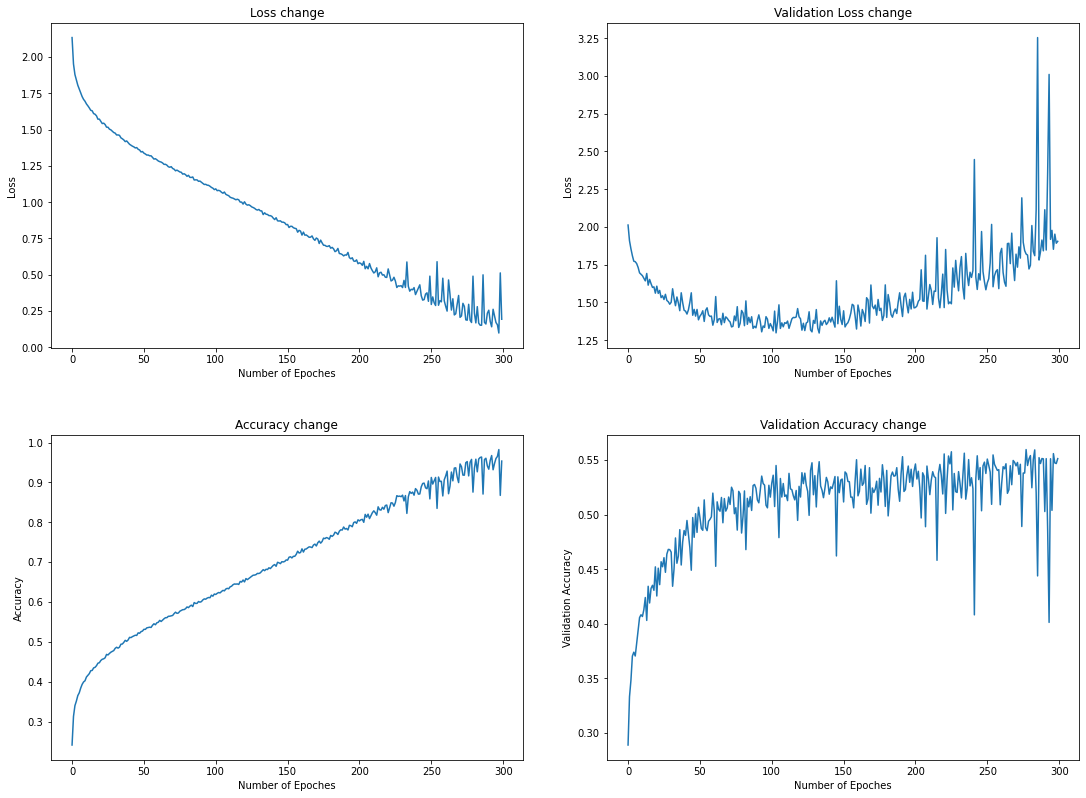

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
plt.subplot(221)
plt.plot(H.history['loss'])
plt.xlabel('Number of Epoches')
plt.ylabel('Loss')
plt.title('Loss change')

plt.subplot(222)
plt.plot(H.history['val_loss'])
plt.xlabel('Number of Epoches')
plt.ylabel('Loss')
plt.title('Validation Loss change')

plt.subplot(223)
plt.plot(H.history['accuracy'])
plt.xlabel('Number of Epoches')
plt.ylabel('Accuracy')
plt.title('Accuracy change')

plt.subplot(224)
plt.plot(H.history['val_accuracy'])
plt.xlabel('Number of Epoches')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy change')

plt.tight_layout(pad = 4)
plt.show()


# Bài 4

### Feedforward

In [2]:
import numpy as np

In [44]:
def softmax(Z):
    e_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    A = e_Z / e_Z.sum(axis=1, keepdims=True)
    return A


def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))


def linear(Z):
    return Z


def feedForward(X, W, b, nodes, active_func):
    A_p = X.copy()
    A_n = X.copy()
    for i in range(len(nodes)):
        A_n = active_func(A_p.dot(W[i]) + b[i])
        A_p = A_n.copy()

    return A_n


In [51]:
X = np.random.randn(1000, 10)  # N = 1000, d = 10
nodes = [256, 128, 64, 10]

W_list = []
b_list = []
for i in range(len(nodes)):
    W_list.append(np.ones((nodes[i-1], nodes[i])))
    b_list.append(np.ones(nodes[i]).reshape(1, -1))

output1 = feedForward(X, W_list, b_list, nodes, linear)


### Keras

In [35]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras import backend as K
from keras.utils import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf

In [52]:
model = Sequential()

model.add(Dense(nodes[0], activation='linear', input_shape=(10,)))
model.add(Dense(nodes[1], activation='linear'))
model.add(Dense(nodes[2], activation='linear'))
model.add(Dense(nodes[3], activation='linear'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               2816      
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
Total params: 44,618
Trainable params: 44,618
Non-trainable params: 0
_________________________________________________________________


In [53]:
# set weights
for i in range(len(nodes)):
    model.layers[i].set_weights([W_list[i], b_list[i].reshape(-1)])


In [54]:
output2 = model.predict(X)

32/32 [==============================] - 0s 1ms/step


In [62]:
print(np.linalg.norm(output1 - output2)/output1.shape[0])

0.727529779694164


<h3>&rarr; Cách tính feedforward đã chính xác<h3>